<a href="https://colab.research.google.com/github/nicobft/megacorp/blob/main/log_exploration/log_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On Exercise 1: Event Log Exploration

In this exercise, you will get first insights into the structure of a real-life event log. We are going to use a log which was part of the Business Process Intelligence Challenge 2012 (BPI Challenge 2012).

**A few details about the scenario of the event log**

The log originates from a Dutch Financial Institute. It contains some 262.200 events in 13.087 cases. Apart from some anonymization, the log contains all data as it came from the financial institute. The process represented in the event log is an application process for a personal loan or overdraft within a global financing organization. The amount requested by the customer is indicated in the case attribute AMOUNT_REQ, which is global, i.e. every case contains this attribute. The event log is a merger of three intertwined sub processes. The first letter of each task name identifies from which sub process (source) it originated from.

In the process, an application is submitted through a webpage. Then, some automatic checks are performed, after which the application is complemented with additional information. This information is obtained trough contacting the customer by phone. If an applicant is eligible, an offer is sent to the client by mail. After this offer is received back, it is assessed. When it is incomplete, missing information is added by again contacting the customer. Then a final assessment is done, after which the application is approved and activated.

**Event type explanation**

| Event Type | Meaning |
| --- | --- |
| States starting with ‘A_’ | States of the application |
| States starting with ‘O_’ |	States of the offer belonging to the application |
| States starting with ‘W_’ |	States of the work item belonging to the application |
COMPLETE |	The task (of type ‘A_’ or ‘O_’) is completed |
SCHEDULE |	The work item (of type ‘W_’) is created in the queue (automatic step following manual actions)|
START 	| The work item (of type ‘W_’) is obtained by the resource|
COMPLETE |	The work item (of type ‘W_’) is released by the resource and put back in the queue or transferred to another queue (SCHEDULE)|

**Event translation**

| Dutch state name | 	English translation |
| --- | --- |
|W_Afhandelen leads |	W_Fixing incoming lead|
|W_Completeren aanvraag  |	W_Filling in information for the application|
|W_Valideren aanvraag |	W_Assessing the application|
|W_Nabellen offertes 	| W_Calling after sent offers|
|W_Nabellen incomplete dossiers |	W_Calling to add missing information to the application|



You should be able to clone the repository containing the notebooks and the example data with the code in the next cell. If this does not work, however, you can also download the event log (XES format, please unzip) [here](http://dx.doi.org/10.4121/uuid:3926db30-f712-4394-aebc-75976070e91f) and then either copy it to your google drive, mount it, and read it from there, or directly upload it using your browser.

In [1]:
# basic configuration
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# import data from google drive
#from google.colab import drive
#drive.mount('/content/drive')

# direct data upload
#from google.colab import files
#files.upload()

# fetch the data file
! wget -O financial_log.xes https://github.com/matthiasweidlich/promi_course/blob/master/log_exploration/financial_log.xes?raw=true

# install some library with basic code for process mining tasks
! pip install pmlab_lite

--2025-11-03 18:23:05--  https://github.com/matthiasweidlich/promi_course/blob/master/log_exploration/financial_log.xes?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/matthiasweidlich/promi_course/raw/refs/heads/master/log_exploration/financial_log.xes [following]
--2025-11-03 18:23:05--  https://github.com/matthiasweidlich/promi_course/raw/refs/heads/master/log_exploration/financial_log.xes
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/matthiasweidlich/promi_course/refs/heads/master/log_exploration/financial_log.xes [following]
--2025-11-03 18:23:06--  https://raw.githubusercontent.com/matthiasweidlich/promi_course/refs/heads/master/log_exploration/financial_log.xes
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 1

## Import Event Log
We first use the PMLab library to load the event log.

In [2]:
from pmlab_lite.helper.io import xes

log_file = 'financial_log.xes'
log = xes.import_xes(log_file)

Processing log...


2716054it [00:16, 164259.95it/s]


Let's check how many traces are in the log and inspect the first three of them.

In [3]:
print('Load log with %s traces.' %len(log.get_traces()))
log.print_traces(0,3)

Load log with 13087 traces.
TRACE_ID: 173688 (trace number 0 )
  concept:name               lifecycle:transition                time:timestamp 
> A_SUBMITTED                COMPLETE                            10/01/2011 00:38:44.546000
> A_PARTLYSUBMITTED          COMPLETE                            10/01/2011 00:38:44.880000
> A_PREACCEPTED              COMPLETE                            10/01/2011 00:39:37.906000
> W_Completeren aanvraag     SCHEDULE                            10/01/2011 00:39:38.875000
> W_Completeren aanvraag     START                               10/01/2011 11:36:46.437000
> A_ACCEPTED                 COMPLETE                            10/01/2011 11:42:43.308000
> O_SELECTED                 COMPLETE                            10/01/2011 11:45:09.243000
> A_FINALIZED                COMPLETE                            10/01/2011 11:45:09.243000
> O_CREATED                  COMPLETE                            10/01/2011 11:45:11.197000
> O_SENT                    

## Section 1: Traces
Each log contains at least one trace. Each trace again consists of events. In the first section, you will inspect several trace properties, like trace length, trace variants and more.

### Trace length
The number of events in a trace defines its length. The code snippet below computes the length of the shortest and the longest trace in the log.

In [4]:
max_length = 0
min_length = 1000

for trace in log.get_traces():
    if len(trace) > max_length:
        max_length = len(trace)

    if len(trace) < min_length:
        min_length = len(trace)

print('The longest trace contains %s events. The shortest trace: %s events.' %(max_length, min_length))

The longest trace contains 175 events. The shortest trace: 3 events.


**Task**: Compute the length of all traces in the log. Use a histogram to visualize your findings.

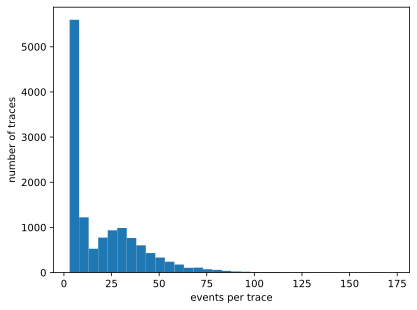

In [5]:
import matplotlib.pyplot as plt

trace_length = []

##################
# Your code
##################

for trace in log.get_traces():
  trace_length.append(len(trace))

plt.hist(trace_length, bins=range(min_length, max_length, 5))
plt.xlabel('events per trace')
plt.ylabel('number of traces')
plt.show()

### Trace variants
A trace can be seen as a sequence of events. Since the same sequence of event classes may occur multiple times in the same log, it might be interesting to know how many different traces exist. Such different traces are called trace variants. The code snippet below computes all trace variants in the log:

In [6]:
trace_list = []

for trace in log.get_traces():
    events = []
    for event in trace:
        events.append(event['concept:name'])

    trace_list.append(tuple(events))

trace_variants = set(trace_list)

print('The log contains %s trace variants.' %len(trace_variants))

The log contains 4366 trace variants.


### Trace variant frequency

**Task**: Compute the frequency of each trace variant in the log.

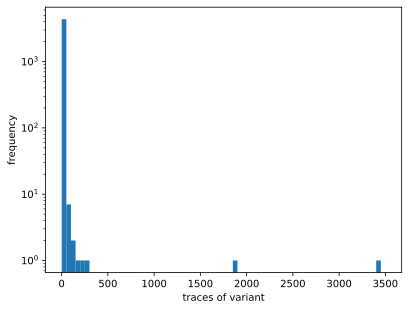

In [7]:
from collections import Counter
# counter = [1]

##################
# Your code
##################
counter = Counter(trace_list)

plt.hist(counter.values(), bins=range(min(counter.values()), max(counter.values())+100, 50))
plt.xlabel('traces of variant')
plt.ylabel('frequency')
plt.yscale('log')
plt.show()

**Task**: Which variant is the most frequent one?

In [8]:
##################
# Your code
##################

print("Most frequent trace variance:" + str(counter.most_common(1)))

Most frequent trace variance:[(('A_SUBMITTED', 'A_PARTLYSUBMITTED', 'A_DECLINED'), 3429)]


### Trace duration
Events may have several attributes like a timestamp or a resource. We can use these timestamps to compute the duration of a single trace. The following code returns the shortest and longest duration of all traces in the log.

In [9]:
from datetime import datetime, timedelta


max_duration = timedelta(microseconds=1)
min_duration = timedelta(days=10000)

for trace in log.get_traces():

    # we only need to consider the first and last event in the trace
    first_e = trace[0]
    last_e = trace[-1]

    t0 = first_e['time:timestamp']
    t1 = last_e['time:timestamp']
    duration = t1 - t0

    if duration > max_duration:
        max_duration = duration
    elif duration < min_duration:
        min_duration = duration

print('The shortest process instance took %s; the longest %s' %(min_duration, max_duration))

The shortest process instance took 0:00:01.855000; the longest 137 days, 5:18:56.012000


**Task:** Compute the duration of each trace in seconds in the log and visualize the result in a histogram. *Hint*: use the method `total_seconds()` to obtain the number of seconds from a duration object.

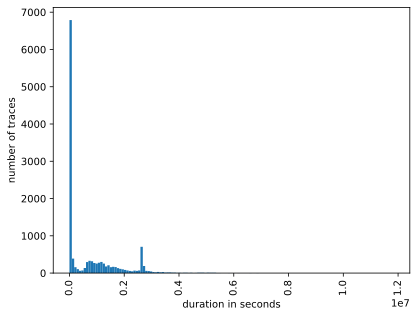

In [10]:
durations = [0]

##################
# Your code
##################

for trace in log.get_traces():
  first_e = trace[0]
  last_e = trace[-1]

  t0 = first_e['time:timestamp']
  t1 = last_e['time:timestamp']
  duration = t1 - t0

  durations.append(duration.total_seconds())

plt.hist(durations, bins=range(0, round(max(durations)), 86400))
ax = plt.gca()
plt.xticks(rotation='vertical')
plt.xlabel('duration in seconds')
plt.ylabel('number of traces')
plt.show()

### Trace start days
We can use timestamps to get even more insights. For example, it might be interesting to know at which weekday the most process instances start.

**Task:** Extract for all traces the day of the week at which the instance was started and visualize the results in a histogram. *Hint*: use `isoweekday()` to get the weekday of an datetime object.

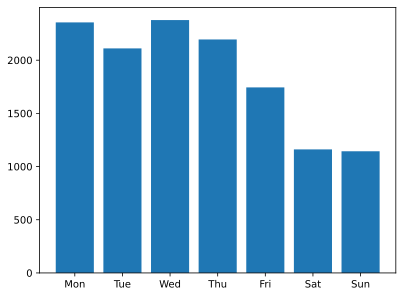

In [17]:
import numpy as np
import pprint

weekdays = []

##################
# Your code
##################

for trace in log.get_traces():
  first_e = trace[0]
  t0 = first_e['time:timestamp']
  weekdays.append(t0.isoweekday())

data = np.bincount(weekdays)[1:]
x_ticks = range(0,len(data), 1)
plt.bar(x_ticks, data)
ax = plt.gca()
ax.set_xticks(x_ticks)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

## Section 2: Events
So far, you got some insights into the trace level of the event log. Now, we will have a closer look at the individual events.

### Events in the log
Let's consider the total number of events in the log.

In [12]:
from pprint import pprint

events = [e for t in log.get_traces() for e in t]
print('The log contains %s events.\n' %len(events))
print('Information that is stored for one event:')
pprint(events[0])

The log contains 262200 events.

Information that is stored for one event:
{'concept:name': 'A_SUBMITTED',
 'lifecycle:transition': 'COMPLETE',
 'org:resource': '112',
 'time:timestamp': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}


### Event classes
Events may refer to different lifecycle states of activity execution. For example, the execution of an activity *A* can be scheduled, started and finally be completed. Here, the lifecycle of executing activity *A* has three states. Each state transition in such a lifecycle of activity execution can be considered as a separate event class. For example, "an activity of name A being started" and "an activity of name A being scheduled" are then two separate event classes.

**Task**: Get the number of event classes based on information about the executed activity and the lifecycle transition and print out all identified event classes.

In [13]:
event_classes = set()

##################
# Your code
##################

print('The log contains %s event classes.' %len(event_classes))
pprint(event_classes)

The log contains 0 event classes.
set()


### Event schedule
We already computed how many process instances started at which day of the week. We can do the same for each event class.

**Task:** Use the code snippet below as a starting point. *Hint:* use the methods `get_timestamp()` and `isoweekday()`.

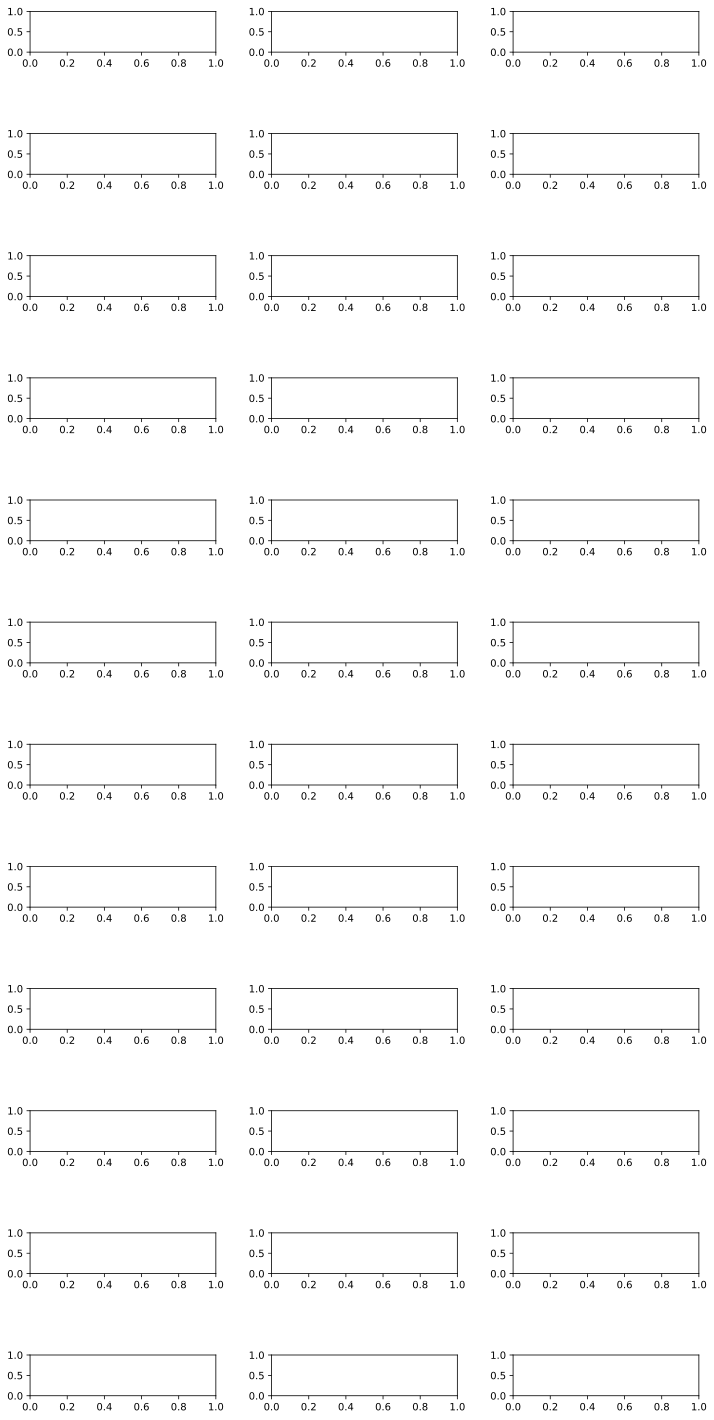

In [14]:
# setup subplots
fig, ax = plt.subplots(12, 3, figsize=(12, 25))
fig.subplots_adjust(hspace = 2, wspace=0.3)
ax = ax.flatten()

for idx, target_event in enumerate(list(event_classes)):
    weekdays = []

    ##################
    # Your code
    ##################

    # plot
    data = np.bincount(weekdays,minlength=8)[1:]

    x_ticks = range(0,len(data), 1)
    ax[idx].bar(x_ticks, data)
    ax[idx].set_xticks(x_ticks)
    ax[idx].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
    ax[idx].set_title(target_event[0] + ' ' + target_event[1])

plt.show()

### Event resource assignments
Sometimes an event is processed by a resource. Possible resources are machines and employees. The used resource can be specified in the events attributes.

**Task:** How many different resources are used across the process instances?

In [15]:
resources = []

##################
# Your code
##################

print('All process instances use %s different resource in total' % len(set(resources)))

All process instances use 0 different resource in total


**Task**: Are all events processed by a resource? If not, compute the ratio of events that are processed by a resource.

In [16]:
no_res = 0

##################
# Your code
##################

perc_res = 0 if len(resources) == 0 else ((len(resources)-no_res)/len(resources))*100
print('%.2f%% of all events are processed by a resource.' % perc_res)

0.00% of all events are processed by a resource.


## -- End